In [5]:
import sys

import tensorflow.keras
import pandas as pd
import sklearn as sk
import tensorflow as tf

print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tensorflow.keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

Tensor Flow Version: 2.2.0
Keras Version: 2.3.0-tf

Python 3.8.3 (default, May 19 2020, 06:50:17) [MSC v.1916 64 bit (AMD64)]
Pandas 1.0.3
Scikit-Learn 0.23.1
GPU is NOT AVAILABLE


In [7]:
from keras.applications.vgg19 import VGG19
from keras.models import Model, load_model
from keras.layers import Dense, GlobalAveragePooling2D, Flatten
from __future__ import print_function
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from keras.callbacks import ReduceLROnPlateau, CSVLogger, EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
%matplotlib inline

Using TensorFlow backend.


In [8]:
classes = ['Melanoma-Begin',
           'Melanoma-malignant',
           'Nevus-Begin',
           'Nevus-malignant']
classes

['Melanoma-Begin', 'Melanoma-malignant', 'Nevus-Begin', 'Nevus-malignant']

In [15]:
base_model = VGG19(include_top=False, weights='imagenet', input_shape=(32,32,3))

for layer in base_model.layers[:-5]:
  layer.trainable = False

output = base_model.output
x = GlobalAveragePooling2D()(output)
x = Dense(1024, activation='relu')(x)
x = Dense(4, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=x)
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0   

In [2]:
!pwd

/cygdrive/c/Users/pirana/Documents/My_Projects


The system cannot find the path specified.


In [3]:
!ls

Image-class.ipynb
Python_project
data set.zip

The system cannot find the path specified.



data_set
image-classifier.ipynb
predict_vgg19.ipynb


In [5]:
!ls data_set
!pwd

test
train


The system cannot find the path specified.


In [6]:
import os
len(os.listdir('data_set/train'))

4

In [16]:

lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1), cooldown=0, patience=5, min_lr=0.5e-6)
early_stopper = EarlyStopping(min_delta=0.001, patience=5)

model_chkpt = ModelCheckpoint('vgg19_20epochs.h5',
                              monitor='val_loss', verbose=1, 
                              save_best_only=True)
batch_size = 32
nb_classes = 23
nb_epoch = 20
data_augmentation = True

# input image dimensions
img_rows, img_cols = 32, 32
# The CIFAR10 images are RGB.
img_channels = 3
train_path='data_set/train'
test_path='data_set/test'
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_data=train_datagen.flow_from_directory(train_path,classes=classes,target_size=(32,32),batch_size=62)
test_data=test_datagen.flow_from_directory(test_path,classes=classes,target_size=(32,32),batch_size=62)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit_generator(train_data,steps_per_epoch=124,validation_data=test_data,validation_steps=33,epochs=20,verbose=1, 
                            callbacks=[lr_reducer, model_chkpt])

# history=model.fit_generator(aug.flow(train_data, batch_size=65),
# 	validation_data=(test_data), steps_per_epoch=33,
# 	epochs=20)

model.save('final_vgg1920epochs.h5')
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Found 2459 images belonging to 4 classes.
Found 293 images belonging to 4 classes.
Epoch 1/20
124/124 [==============================] - 482s 4s/step - loss: 0.9837 - accuracy: 0.4742 - val_loss: 0.8942 - val_accuracy: 0.4835

Epoch 00001: val_loss improved from inf to 0.89418, saving model to vgg19_20epochs.h5
Epoch 2/20
124/124 [==============================] - 486s 4s/step - loss: 0.8123 - accuracy: 0.4936 - val_loss: 0.8724 - val_accuracy: 0.5091

Epoch 00002: val_loss improved from 0.89418 to 0.87237, saving model to vgg19_20epochs.h5
Epoch 3/20
124/124 [==============================] - 560s 5s/step - loss: 0.7935 - accuracy: 0.5201 - val_loss: 0.7846 - val_accuracy: 0.4516

Epoch 00003: val_loss improved from 0.87237 to 0.78456, saving model to vgg19_20epochs.h5
Epoch 4/20
124/124 [==============================] - 512s 4s/step - loss: 0.8016 - accuracy: 0.5254 - val_loss: 0.9477 - val_accuracy: 0.4577

Epoch 00004: val_loss did not improve from 0.78456
Epoch 5/20
124/124 [====

KeyError: 'acc'

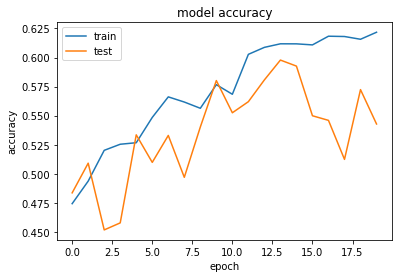

In [21]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

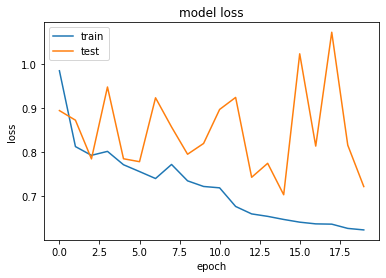

In [22]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [27]:
model = load_model('final_vgg1920epochs.h5', compile=True)
import cv2
img = 'data_set/66.jpg'
img = cv2.resize(cv2.imread(img), (32,32)) / 255.0
prediction = model.predict(img.reshape(1,32,32,3))
print(prediction)
classes[prediction.argmax()]

[[8.99888635e-01 1.00111373e-01 1.02454684e-10 5.67690783e-10]]


'Melanoma-Begin'

Epoch 1/10
124/124 [==============================] - 408s 3s/step - loss: 0.6066 - accuracy: 0.6334 - val_loss: 0.9742 - val_accuracy: 0.5741

Epoch 00001: val_loss did not improve from 0.70318
Epoch 2/10
124/124 [==============================] - 397s 3s/step - loss: 0.6021 - accuracy: 0.6329 - val_loss: 1.0831 - val_accuracy: 0.5620

Epoch 00002: val_loss did not improve from 0.70318
Epoch 3/10
124/124 [==============================] - 475s 4s/step - loss: 0.6035 - accuracy: 0.6289 - val_loss: 0.7975 - val_accuracy: 0.5622

Epoch 00003: val_loss did not improve from 0.70318
Epoch 4/10
124/124 [==============================] - 475s 4s/step - loss: 0.5953 - accuracy: 0.6342 - val_loss: 1.1701 - val_accuracy: 0.5480

Epoch 00004: val_loss did not improve from 0.70318
Epoch 5/10
124/124 [==============================] - 447s 4s/step - loss: 0.5998 - accuracy: 0.6372 - val_loss: 0.8353 - val_accuracy: 0.5522

Epoch 00005: val_loss did not improve from 0.70318
Epoch 6/10
124/124 [=====

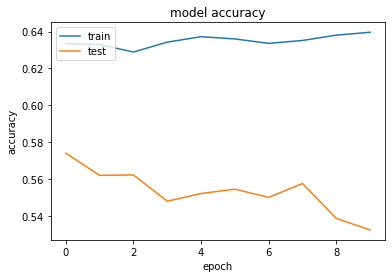

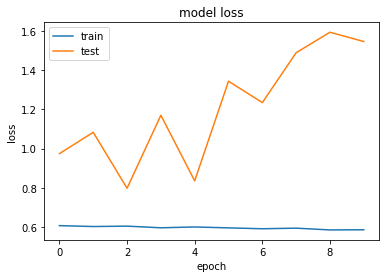

In [28]:
model = load_model('final_vgg1920epochs.h5', compile='True')
history=model.fit_generator(train_data,steps_per_epoch=124,validation_data=test_data,validation_steps=33,epochs=10,verbose=1, callbacks=[lr_reducer, model_chkpt])
model.save('final_vgg1930epochs.h5')

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()